## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
# to work with json
import json

# visualization libraries
import matplotlib.pylab as plt
# to do exploratory data analysis
import seaborn as sns

# stile for plots
plt.style.use('ggplot')
# expand the number of columns to display
#pd.set_option('max_columns', 200) #no needed in this case

In [2]:
# to import the data from the json file to a dataframe
with open ('/home/bbruno/all_here/python course/vinnie/data/users-data-prod.json', 'r') as file:
    data = json.load(file)

df = pd.json_normalize(data['usersData'])
df.columns

Index(['userId', 'wines', 'tastingNotes', 'pairings'], dtype='object')

## Data understanding

In [3]:
df.shape

(4504, 4)

In [4]:
df.head()

,userId,wines,tastingNotes,pairings
0,131a3994-a510-4ead-93d0-3d89f06b9602,[],[],"[{'id': '4tO1hMInfEtHv4IbyIg9', 'date': '2022-..."
1,16e6321b-1dd8-4db0-a491-627055a20d1d,[],[],"[{'id': '4nDez8hvWjj4UscxL3Op', 'date': '2023-..."
2,bffc7c74-ccf9-429b-a6a5-d7bc8a53441e,[],[],"[{'id': '0eaezCUA4haEf2GVMSCo', 'date': '2023-..."
3,97e19ee8-5d4a-4691-bdf0-a20f284d9f0a,[],[],"[{'id': 'A2AF5ggyi9GtyZf1x9LG', 'date': '2023-..."
4,690e6b1c-8af0-4a8b-b4a8-44030d7c7744,"[{'grapes': ['Cabernet Sauvignon', 'Merlot', '...",[],"[{'id': 'yNiSBgN9jZ9b1aVz2pND', 'date': '2021-..."


In [5]:
# to check the data types for each column
df.dtypes

userId          object
wines           object
tastingNotes    object
pairings        object
dtype: object

In [6]:
# to do this in a better way I need to clean more the data 
df.describe()

,userId,wines,tastingNotes,pairings
count,4504,4504,4504,4504
unique,4504,1236,244,4038
top,131a3994-a510-4ead-93d0-3d89f06b9602,[],[],[]
freq,1,3269,4261,467


# Data preparation

## feedback on pairings

In [7]:
feedback_data = []
for user_data in data['usersData']:
    for pairing in user_data['pairings']:
        feedback_data.append({
            'userId': user_data['userId'],
            #'pairingId': pairing['id'], # not needed
            #'date': pairing['date'], # not needed
            
            'feedback': pairing['feedbackOnPairing'],
            'wine': pairing['selected']
        })

feedback_df = pd.DataFrame(feedback_data)
###############################

#convert "feedback" from string to int
feedback_mapping = {'neutral': 0, 'like': 1, 'dislike': -1}
feedback_df['feedback'] = feedback_df['feedback'].map(feedback_mapping)

# Fill any missing values with a default value (0 in this case)
feedback_df['feedback'] = feedback_df['feedback'].fillna(0)

# print the unique values in the feedback column
print("the values after mapping are:", feedback_df['feedback'].unique())

# Converting the column to integers
feedback_df = feedback_df.astype({'feedback': 'int'})

print(feedback_df.dtypes)
feedback_df


the values after mapping are: [ 0 -1  1]
userId      object
feedback     int64
wine        object
dtype: object


,userId,feedback,wine
0,131a3994-a510-4ead-93d0-3d89f06b9602,0,sangiovese_red
1,131a3994-a510-4ead-93d0-3d89f06b9602,0,carmenere_red
2,131a3994-a510-4ead-93d0-3d89f06b9602,0,riesling_white
3,131a3994-a510-4ead-93d0-3d89f06b9602,0,chardonnay_white
4,131a3994-a510-4ead-93d0-3d89f06b9602,0,nebbiolo_red
...,...,...,...
10116,5df09a59-c0e4-4c83-8e32-007b39edce53,0,nero_davola_red
10117,5df09a59-c0e4-4c83-8e32-007b39edce53,0,sangiovese_red
10118,6caf1bcb-095c-4b1c-a412-c3b6860949b0,0,merlot_red
10119,6caf1bcb-095c-4b1c-a412-c3b6860949b0,0,champagne_white


In [8]:
feedback_df.describe()

,feedback
count,10121.000000
mean,0.017982
std,0.174095
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
# Feedback from pairings
print("the number of total feedback is:", feedback_df.shape[0])
print("the number of neutral feedback is:", feedback_df[feedback_df['feedback'] == 0].shape[0])
print("the number of positive feedback is:", feedback_df[feedback_df['feedback'] == 1].shape[0])
print("the number of negative feedback is:", feedback_df[feedback_df['feedback'] == -1].shape[0])


the number of total feedback is: 10121
the number of neutral feedback is: 9811
the number of positive feedback is: 246
the number of negative feedback is: 64


## rate on tastingNotes

In [10]:
# From the wines list takes [userId, name, id, tastingNoteIds]
rate_on_wine = []
for user_data in data['usersData']:
    for wine in user_data['wines']:
        for tasteNoteid in wine['tasteNoteIds']:
            rate_on_wine.append({
                'userId': user_data['userId'],
                'wine': wine['name'],
                'wineId': wine['id'],
                'tastingNoteId': tasteNoteid
            })

rate_on_wine_df = pd.DataFrame(rate_on_wine)
print(rate_on_wine_df.shape)
rate_on_wine_df.head()

# From the tastingNotes list takes [id, wineId, rate]
tastingNotes = []
for user_data in data['usersData']:
    for tastingNote in user_data['tastingNotes']:
        tastingNotes.append({
            'id': tastingNote['id'],
            'wineId': tastingNote['wineId'],
            'rate': tastingNote['rate'],      
        })

tastingNotes_df = pd.DataFrame(tastingNotes)
print(tastingNotes_df.shape)

# Merge the two tables when wineId and id.equals(tastingNoteId)

merged_df = pd.merge(rate_on_wine_df, tastingNotes_df, left_on='tastingNoteId', right_on='id')
merged_df

(1271, 4)
(1290, 3)


,userId,wine,wineId_x,tastingNoteId,id,wineId_y,rate
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,6V7XZnXSK2LYF9jzI7LR,roCWZ72rDDLT6Q5Mcc7m,roCWZ72rDDLT6Q5Mcc7m,6V7XZnXSK2LYF9jzI7LR,5
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,bINBmCq7FXjVXt1sj6f8,XJ60d8BLy1YOzcr7no1J,XJ60d8BLy1YOzcr7no1J,bINBmCq7FXjVXt1sj6f8,2
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,ckVI0IUPCHuhT00plzm2,4Buw0MdNDOZ4tCSRw88d,4Buw0MdNDOZ4tCSRw88d,ckVI0IUPCHuhT00plzm2,3
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,3s8PZXoVIaInrJqMbxs5,UUpZSMTF7VZVDPX17pgw,UUpZSMTF7VZVDPX17pgw,3s8PZXoVIaInrJqMbxs5,5
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,B1VJSCml6AZ47Hf8SpEu,DCTkjJunOye0y3nrg8ul,DCTkjJunOye0y3nrg8ul,B1VJSCml6AZ47Hf8SpEu,4
...,...,...,...,...,...,...,...
1264,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,bPkjkqyHCazKNY1YBN8N,vbInbkGi5vgFpJw7uO3o,vbInbkGi5vgFpJw7uO3o,bPkjkqyHCazKNY1YBN8N,None
1265,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Piceno Bacchus,waRUqzj7zJFnvZE6ZzlA,OC1bFth3SPBkFNRKIvW5,OC1bFth3SPBkFNRKIvW5,waRUqzj7zJFnvZE6ZzlA,5
1266,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,TN52mXAU59Bb1dppnVa7,TN52mXAU59Bb1dppnVa7,y1CVSKNcIV3reYGh00YA,None
1267,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,sMkSAMC1wkpEcdypKDbR,sMkSAMC1wkpEcdypKDbR,y1CVSKNcIV3reYGh00YA,None


In [11]:
merged_df.columns

Index(['userId', 'wine', 'wineId_x', 'tastingNoteId', 'id', 'wineId_y',
       'rate'],
      dtype='object')

In [12]:
# Dropping useless columns

# The columns that we need are: userId, wine, rate
rate_on_tastingNotes = merged_df[['userId', 'wine', 'rate']].copy() 
rate_on_tastingNotes

,userId,wine,rate
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,5
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,2
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,3
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,5
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,4
...,...,...,...
1264,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,None
1265,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Piceno Bacchus,5
1266,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,None
1267,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,None


In [13]:
# To check the unique value of wine
rate_on_tastingNotes['rate'].unique()


array([5, 2, 3, 4, None, 1, '4', '1'], dtype=object)

In [14]:
# How many None values do we have in rate
rate_on_tastingNotes['rate'].isnull().sum()

261

In [15]:
# To show the None values
rate_on_tastingNotes[rate_on_tastingNotes['rate'].isnull()]
# To drop the None values
rate_on_tastingNotes = rate_on_tastingNotes.dropna()
rate_on_tastingNotes['rate'].unique()


array([5, 2, 3, 4, 1, '4', '1'], dtype=object)

In [16]:

# To Convert "rate" from string to int16 using astype
rate_on_tastingNotes['rate'] = rate_on_tastingNotes['rate'].astype('int16')
rate_on_tastingNotes['rate'].unique()
#the warning is because of the None values that we dropped

/tmp/ipykernel_6209/49025768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_on_tastingNotes['rate'] = rate_on_tastingNotes['rate'].astype('int16')


array([5, 2, 3, 4, 1], dtype=int16)

In [17]:
rate_on_tastingNotes.describe()

,rate
count,1008.000000
mean,3.601190
std,0.934646
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [18]:
# This cell is just to see the dataframe after the cleaning
rate_on_tastingNotes

,userId,wine,rate
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,5
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,2
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,3
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,5
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,4
...,...,...,...
1258,7f6dede6-b8b5-4bb6-a1ca-ae58c79c0ea7,Beyerskloof Western Cape,2
1259,7f6dede6-b8b5-4bb6-a1ca-ae58c79c0ea7,Valle del Limari Reserva Pinot Noir,4
1261,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Château Haut Bommes Sauternes,4
1263,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Closeburn Chardonnay,4


In [19]:
rate_on_tastingNotes.shape

(1008, 3)

## Feature Understanding

In [20]:
# Univerate analysis
feedback_df['feedback'].value_counts()

 0    9811
 1     246
-1      64
Name: feedback, dtype: int64

In [21]:
rate_on_tastingNotes['rate'].value_counts().sort_index()

1     19
2     87
3    346
4    381
5    175
Name: rate, dtype: int64

Text(0, 0.5, 'Rates')

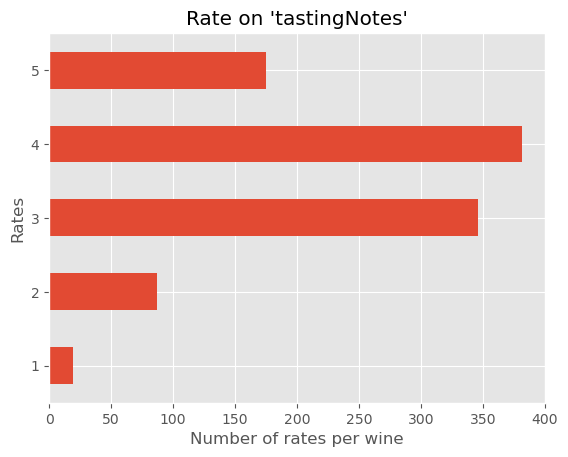

In [22]:
ax = rate_on_tastingNotes['rate'].value_counts().sort_index().plot(kind='barh', title= 'Rate on \'tastingNotes\'')
ax.set_xlabel('Number of rates per wine')
ax.set_ylabel('Rates')

Text(0, 0.5, 'Feedback')

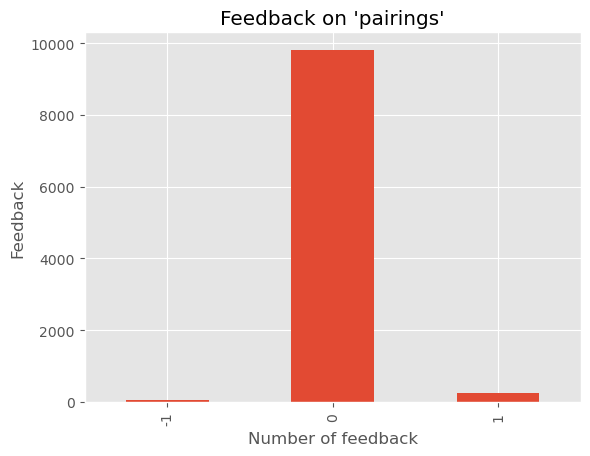

In [23]:
ax = feedback_df['feedback'].value_counts().sort_index().plot(kind='bar', title= 'Feedback on \'pairings\'')
ax.set_xlabel('Number of feedback')
ax.set_ylabel('Feedback')


Text(0, 0.5, 'Density')

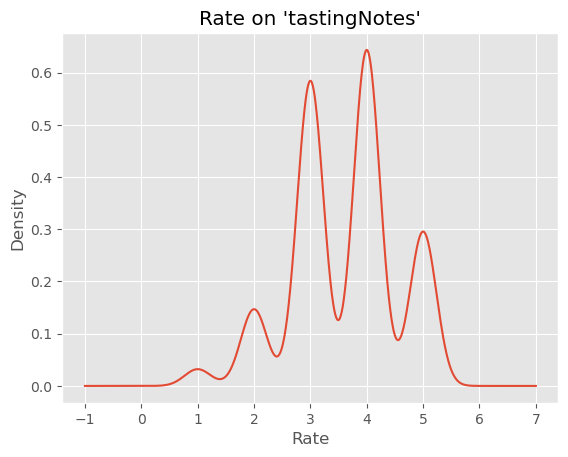

In [24]:
# Density plot
ax = rate_on_tastingNotes['rate'].plot(kind='kde', title='Rate on \'tastingNotes\'')
ax.set_xlabel('Rate')
ax.set_ylabel('Density')

## Feature relationships

In [25]:
# another dataframe to analyze the features on wine and tastingNotes
# I want to analyze the relation for the wine and user by [userId, winename, id,color, category, sweetness, body wineId, intensity, acidity, depth, clarity, rate, vintage, hue,id, tannins]

# From the wines list takes [userId, name, id, grapes, apellation, color, categor]

wines2 = []
for user_data in data['usersData']:
    for wine in user_data['wines']:
        #for grape in wine['grapes']:
        for tasteNoteid in wine['tasteNoteIds']:
            wines2.append({
                'userId': user_data['userId'],
                'wine': wine['name'],
                'wineId': wine['id'],
                'color': wine['color'],
                'grapes': wine['grapes'],
                #'grapes': grapes,
                'appellation': wine['appellation'],
                'category': wine['category'],
                'tasteNoteid': wine['tasteNoteIds'],
                'tastingNoteId': tasteNoteid
            })

wines_df2 = pd.DataFrame(wines2)
print(wines_df2.shape)

# From the tastingNotes list takes

tastingNotes2 = []
for user_data in data['usersData']:
    for tastingNote in user_data['tastingNotes']:
        #for aroma in tastingNote['aromaKeys']:

        tastingNotes2.append({

            'id': tastingNote['id'], #this is the same 
            'wineId': tastingNote['wineId'],
            'rate': tastingNote['rate'],  
            'aromaKeys': tastingNote['aromaKeys'],
            'sweetness': tastingNote['sweetness'],
            'body': tastingNote['body'],
            'intensity': tastingNote['intensity'],
            'acidity': tastingNote['acidity'],
            'depth': tastingNote['depth'],
            'clarity': tastingNote['clarity'],
            'vintage': tastingNote['vintage'],
            'hue': tastingNote['hue'],
            'tannins': tastingNote['tannins']
    })

tastingNotes_df2 = pd.DataFrame(tastingNotes2)
print(tastingNotes_df.shape)

# Merge the two tables when wineId and id.equals(tastingNoteId)

merged_df2 = pd.merge(rate_on_wine_df, tastingNotes_df, left_on='tastingNoteId', right_on='id')
merged_df2

(1271, 9)
(1290, 3)


,userId,wine,wineId_x,tastingNoteId,id,wineId_y,rate
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,6V7XZnXSK2LYF9jzI7LR,roCWZ72rDDLT6Q5Mcc7m,roCWZ72rDDLT6Q5Mcc7m,6V7XZnXSK2LYF9jzI7LR,5
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,bINBmCq7FXjVXt1sj6f8,XJ60d8BLy1YOzcr7no1J,XJ60d8BLy1YOzcr7no1J,bINBmCq7FXjVXt1sj6f8,2
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,ckVI0IUPCHuhT00plzm2,4Buw0MdNDOZ4tCSRw88d,4Buw0MdNDOZ4tCSRw88d,ckVI0IUPCHuhT00plzm2,3
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,3s8PZXoVIaInrJqMbxs5,UUpZSMTF7VZVDPX17pgw,UUpZSMTF7VZVDPX17pgw,3s8PZXoVIaInrJqMbxs5,5
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,B1VJSCml6AZ47Hf8SpEu,DCTkjJunOye0y3nrg8ul,DCTkjJunOye0y3nrg8ul,B1VJSCml6AZ47Hf8SpEu,4
...,...,...,...,...,...,...,...
1264,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,bPkjkqyHCazKNY1YBN8N,vbInbkGi5vgFpJw7uO3o,vbInbkGi5vgFpJw7uO3o,bPkjkqyHCazKNY1YBN8N,None
1265,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Piceno Bacchus,waRUqzj7zJFnvZE6ZzlA,OC1bFth3SPBkFNRKIvW5,OC1bFth3SPBkFNRKIvW5,waRUqzj7zJFnvZE6ZzlA,5
1266,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,TN52mXAU59Bb1dppnVa7,TN52mXAU59Bb1dppnVa7,y1CVSKNcIV3reYGh00YA,None
1267,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,sMkSAMC1wkpEcdypKDbR,sMkSAMC1wkpEcdypKDbR,y1CVSKNcIV3reYGh00YA,None


In [27]:
merged_df2.columns


,userId,wine,rate
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,5
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,2
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,3
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,5
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,4
...,...,...,...
1264,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,None
1265,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Piceno Bacchus,5
1266,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,None
1267,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,None
